In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time as tm
from scipy import stats
import math
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

# Задача 1.
### Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

0.004935399999999923


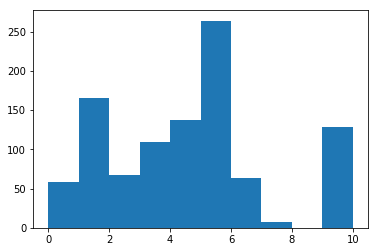

In [2]:
a = np.array ([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.24])
a /= np.sum(a)
a = np.array ([np.sum(a[:k]) for k in range(1, 11)])
f = np.empty(1000, dtype=np.int8)

t = tm.perf_counter()
for i in range(1000):
    el = np.random.rand()
    j = 0
    while (a[j] < el):
        j += 1
    f[i] = j

time_1 = tm.perf_counter() - t
print(time_1)

plt.hist(f, range = (0,10)) 
plt.show()

Для упорядоченных веов.

0.0021293000000000006


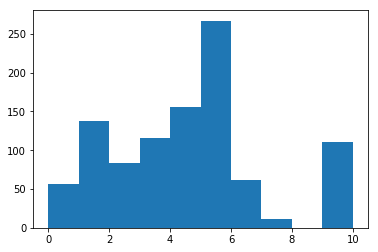

In [3]:
a = np.array ([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.24])
ind = np.argsort (a)[::-1]
a = np.sort (a)[::-1]
a /= np.sum(a)
a = np.array ([np.sum(a[:k]) for k in range(1, 11)])
f = np.empty(1000, dtype=np.int8)

t = tm.perf_counter()
for i in range(1000):
    el = np.random.rand()
    j = 0
    while (a[j] < el):
        j += 1
    f[i] = j

time_2 = tm.perf_counter() - t
print(time_2)

plt.hist(ind[f], range = (0,10))
plt.show()

In [4]:
print ("Отношение времени работы на неупорядоченных весах к времени на упорядоченных равно", time_1/time_2)

Отношение времени работы на неупорядоченных весах к времени на упорядоченных равно 2.317850936927592


# Задача 2.
### Смоделируйте выборку размера 1000 из распределения  Exp(λ) . Постройте выборочную гистограмму и точный график плотности распределения.

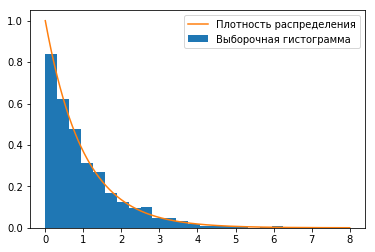

In [5]:
ly = 1
#ly = float(input())

#F_Exp(ly) (x) = 1 - e^(-ly * x)
#F^-1 (t) = -ln(1-t)/ly

f = np.array ([-np.log (1 - np.random.rand()) / ly for i in range(1000)])

plt.hist(f, 20, density = True, label = "Выборочная гистограмма")

X = np.linspace (0, 8, 512)
Y = ly*np.exp (-ly * X)
plt.plot (X, Y, label = "Плотность распределения")

plt.legend()
plt.show()

# Задача 3
### Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

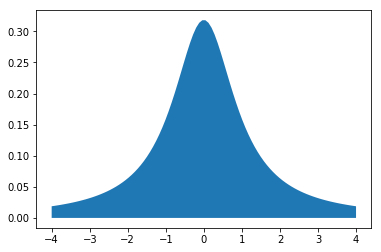

In [6]:
dist = stats.cauchy()
s = np.linspace(-4, 4, 100)
plt.fill_between(s, 0, dist.pdf(s)) #needs to be normalized!
plt.show()

# Обоснование метода
### Пусть график плотности y = f(x) сл.в. $\xi$ (с единичным интегралом по прямой) накрыт графиком y = g(x) > f(x), интеграл по прямой от которой конечен и равен S =  $\int_{-\infty}^{\infty} g(t)dt$, G(x) = $\int_{-\infty}^{x} g(t)dt$,  $F_\xi(x)$ = $\int_{-\infty}^{x} f(t)dt$. Обозначим ( $\nu$ ,  $\eta$ ) вектор, равномерно распределенный в области {0 < y < g(x)}. Тогда функция распределения абсцисс точек, попавших под график y = f(x) - это условная вероятность $P(\nu < x | \eta < f(\nu)) = \frac{P(\nu < x,  \eta < f(\nu))}{ P(\eta < f(\nu))} = \frac{\frac{F_\xi(x)}{S}}{\frac{1}{S}} = F_\xi(x)$

In [7]:
a_1, a_2 = -4, 4
b_1, b_2 = 0, 1/np.pi        # координаты квадрата, накрывающего график плотности

a = np.empty (1000)
i = 0
while (i<1000):
    x = np.random.rand()*(a_2 - a_1)+a_1
    y = np.random.rand()*(b_2 - b_1)+b_1
    if (y < dist.pdf(x)):
        a[i] = x
        i += 1

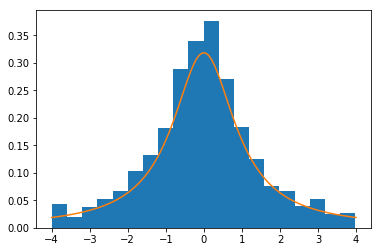

In [8]:
plt.hist (a, 20, density = True)
plt.plot(s, dist.pdf(s))
plt.show()

# Задача 4.
### Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

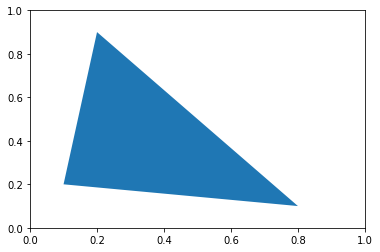

In [9]:
polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

In [10]:
a = np.empty ((500, 2))
pol = 0.1 * np.array([[1, 2], [2, 9], [8, 1]])
side = np.array ([pol[2] - pol[0], pol[1] - pol[0]])
for i in range (500):
    x = np.random.rand()
    y = np.random.rand()
    if (x+y > 1):
        x, y = 1-x, 1-y
    a[i] = pol[0] + x*side[0] + y*side[1]

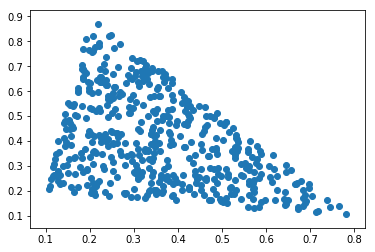

In [11]:
plt.scatter (a[:, 0], a[:, 1])
plt.show()

# Задача 5
### Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

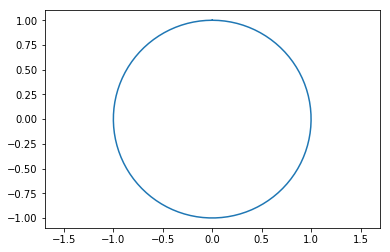

In [12]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

In [13]:
a = np.empty ((500, 2))
for i in range (500):
    r = np.sqrt(np.random.rand())
    fi = np.random.rand()*2*np.pi

    a[i] = np.array ([r*np.cos(fi), r*np.sin(fi)])

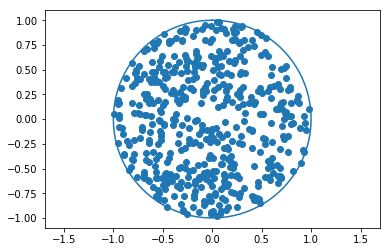

In [14]:
plt.scatter (a[:, 0], a[:, 1])
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

# Задача 6.
### Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

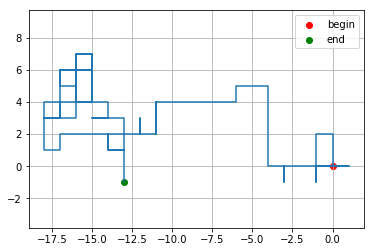

In [15]:
n = 100
wandering = np.empty ((n+1, 2))
wandering[0] = [0, 0]
x = y = 0
for i in range (1, n+1):
    a = np.random.rand()
    if (a < 0.25):
        x += 1
    elif (a < 0.5):
        x -= 1
    elif (a < 0.75):
        y += 1
    else:
        y -= 1
    wandering[i] = [x, y]

plt.grid()
plt.plot(wandering[:, 0], wandering[:, 1])
plt.scatter (0, 0, label = "begin", c = 'r')
plt.scatter (wandering[-1][0], wandering[-1][1], label = "end", c = 'g')
plt.axis('equal')
plt.legend()
plt.show()

# Задача 7.
### Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

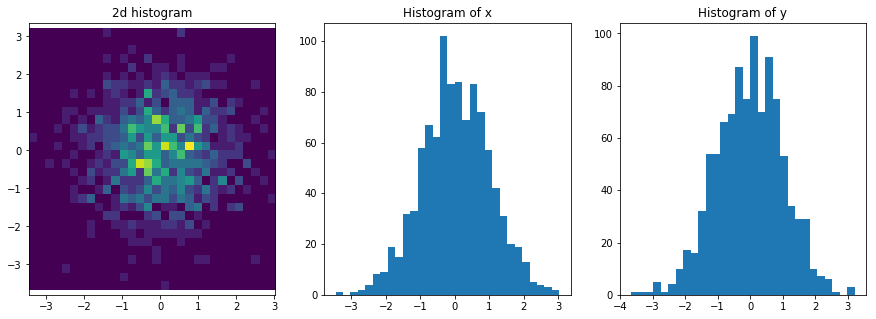

In [16]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

Необходимо доказать, что отображение $ 
g(u,v) = 
\left(
\begin{array} {cc}
 \sqrt {-2\ln u} \cos{2\pi v} \\[1ex]
 \sqrt {-2\ln u} \sin{2\pi v}
\end{array}
\right)
$ переводит распределение $X \sim U( (0, 1)^2 )$ в $N_2 (\begin{pmatrix}0\\0\end{pmatrix}, \begin{pmatrix}1 & 0\\0 & 1\end{pmatrix})$.

$g(u,v)$ - биекция $(0, 1)^2 \rightarrow R^2\backslash0$, поэтому плотность величины $Y = g(X)$ вычисляется по правилу $p_Y(y) = p_X\left(g^{-1}(y)\right) \vert J_{g^{-1}}(y) \vert = \vert J_{g^{-1}}(y) \vert = \frac{1}{ \vert J_{g}(g^{-1}(y)) \vert}$ при $y \neq 0$. 

$J_g(u,v) = 
\left(
\begin{array} {cc}
- \frac {\cos{2\pi v}}{u\sqrt {-2\ln u}}    &  - \frac {\sin{2\pi v}}{u\sqrt {-2\ln u}} \\[1ex]
- 2\pi \sin{2\pi v} \sqrt {-2\ln u}         &    2\pi \cos{2\pi v} \sqrt {-2\ln u}
\end{array}
\right)
\\ 
\vert J_g(u,v) \vert = \frac{2\pi}{u}
\\
p_Y(x, y) = \frac{1}{ \vert J_{g}(g^{-1}(x, y)) \vert} = \frac{u}{2\pi} = \frac{1}{2\pi}e^{\frac{-x^2+y^2}{2}}$

Получили плотность стандартного двумерного гауссовского вектора. Значит, алгоритм действительно генерирует выборку из независимых $N(0,1)$ случайных величин.

# Задача 8.
### Перейдите от вектора из независимых стандартных нормальных величин к гауссовскому вектору с нулевым средним и заданной ниже ковариационно матрицей. Обоснуйте теоретически и численно, что полученный вектор обладает требуемой ковариационной матрицей.

In [17]:
B = np.array([[ 2.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.],
              [ 0.,  4.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
              [ 0.,  0.,  4.,  0.,  0.,  0., -1.,  0.,  0.],
              [ 0., -1.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
              [-1.,  0.,  0.,  0.,  2.,  0.,  0.,  0., -1.],
              [ 0.,  0.,  0.,  0.,  0.,  4.,  0., -1.,  0.],
              [ 0.,  0., -1.,  0.,  0.,  0.,  4.,  0.,  0.],
              [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  4.,  0.],
              [-1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  2.]])
X = np.array([[ 2., -1., -1.],
              [-1.,  2., -1.],
              [-1., -1.,  2.]])
Y = np.array([[ 4., -1.],
              [-1.,  4.]])

Знаем, что симметричную матрицу $A$ можно привести к диагональному виду: $A = QDQ^T = Q\sqrt{D}E(Q\sqrt{D})^T$, где $Q$ — ортогональная матрица, столбцы которой содержат ортонормированный базис из собственных векторов, а $D$ — диагональная матрица с собственными значениями матрицы $A$ на диагонали. Домножение на матрицу $Q$ слева вектора из н.о.р. нормальных сл. величин, растянутых на величину из корней соответствующих собственных значений, будет задавать искомый переход. Матрицу B можно разбить на 4 независимых блока(с нулями на пересечении блоков): 1 блок вида $X$ и 3 блока вида $Y$. 
Для матрицы X собственные значения равны 0, 3 и 3, а ортогональный набор собственных векторыов $\begin{pmatrix}1\\1\\1\end{pmatrix}$, $\begin{pmatrix}1\\-1\\0\end{pmatrix}$ и $\begin{pmatrix}1\\1\\-2\end{pmatrix}$ соответственно. Тогда соответствовать этому блоку будут матрицы $Q_1 =  \begin{pmatrix}\frac{1}{\sqrt{3}} & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{6}} \\ \frac{1}{\sqrt{3}} & -\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{6}} \\ \frac{1}{\sqrt{3}} & 0 & -\frac{2}{\sqrt{6}} \end{pmatrix}$ и $D_1 = \begin{pmatrix} 0 & 0 & 0\\0 & 3  & 0\\ 0 & 0 & 3 \end{pmatrix}$.
Для матрицы Y собственные значения равны 3 и 5, а ортогональный набор собственных векторов: $\begin{pmatrix}1\\1\end{pmatrix}$ и $\begin{pmatrix}1\\-1\end{pmatrix}$ соответственно. Отсюда получаем матрицы  $Q_2 =  \begin{pmatrix}\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \end{pmatrix}$ и $D_1 = \begin{pmatrix} 3 & 0 \\0 & 5\end{pmatrix}$. По ним уже строим искомый вектор, работая отдельно с каждым блоком

In [18]:
n = 100000

Q_1 = np.array ([[1/math.sqrt(3),  1/math.sqrt(2),  1/math.sqrt(6)],
                 [1/math.sqrt(3), -1/math.sqrt(2),  1/math.sqrt(6)],
                 [1/math.sqrt(3),  0             , -2/math.sqrt(6)]])

buf = [np.random.normal(size = n) for i in range(3)]
buf[0] *= 0
buf[1] *= math.sqrt(3)
buf[2] *= math.sqrt(3)
buf = Q_1@buf

A = buf

Q_2 = np.array ([[1/math.sqrt(2),  1/math.sqrt(2)],
                 [1/math.sqrt(2), -1/math.sqrt(2)]])

for i in range (3):
    buf = [np.random.normal(size = n) for i in range(2)]
    buf[0] *= math.sqrt(3)
    buf[1] *= math.sqrt(5)
    buf = Q_2@buf
    A = np.vstack ((A, buf))
    
A = A[[0, 3, 5, 4, 1, 7, 6, 8, 2]]
print(np.cov(A))

[[ 1.99903737e+00 -7.92753777e-03  1.70164722e-02 -6.22773839e-03
  -1.00346317e+00  9.94896101e-04  5.77479122e-04 -1.83443948e-03
  -9.95574199e-01]
 [-7.92753777e-03  3.99141109e+00 -1.18595287e-02 -1.00404507e+00
   8.01388880e-03  6.64807024e-03  4.45479682e-03 -9.49281375e-04
  -8.63510264e-05]
 [ 1.70164722e-02 -1.18595287e-02  3.98282806e+00 -5.47466159e-04
  -3.11694896e-03  2.96754002e-05 -9.96800899e-01  1.80460915e-02
  -1.38995233e-02]
 [-6.22773839e-03 -1.00404507e+00 -5.47466159e-04  4.03035205e+00
   7.83708058e-03  8.01019800e-04  2.67589624e-03 -2.23791423e-03
  -1.60934219e-03]
 [-1.00346317e+00  8.01388880e-03 -3.11694896e-03  7.83708058e-03
   1.99911546e+00 -1.86219046e-02 -4.17495038e-03  8.51902261e-03
  -9.95652293e-01]
 [ 9.94896101e-04  6.64807024e-03  2.96754002e-05  8.01019800e-04
  -1.86219046e-02  4.00469466e+00  2.75594449e-02 -1.00678855e+00
   1.76270085e-02]
 [ 5.77479122e-04  4.45479682e-03 -9.96800899e-01  2.67589624e-03
  -4.17495038e-03  2.7559444

# Задача 9.
### С помощью метода Монте-Карло (бросанием случайной точки в квадрат) оцените число  π . Теоретически обоснуйте необходимое число бросаний, чтобы оценить число  π  с точностью 3 знака после запятой и достоверностью 99%. С помощью метода Монте-Карло оцените, сколько на практике требуется бросаний, чтобы достичь с требуемой достоверностью нужной точности.

In [19]:
q = 8*stats.norm.ppf(1-0.01/2)/0.001
iter = math.ceil (q*q)
count = 0
for i in range(iter):
    x = np.random.rand()*2 - 1
    y = np.random.rand()*2 - 1
    if (x*x + y*y < 1):
        count += 1
print (count/iter*4)

3.1415897699215987


# Обоснование числа бросаний.
Рассмотрим квадрат со стороной 2 и вписанный в него круг радиуса 1. Тогда площадь круга равна $\pi$, а площадь квадрата - 4. Отсюда сразу следует оценка $0 < \pi < 4$, откуда $0 < \frac{\pi}{4}(1 - \frac{\pi}{4}) < 1$. Тогда случайная велиxина, равная индикатору попадания в круг при бросании точки на квадрат имеет распределение Бернулли с параметром $\frac{\pi}{4}$. Её матожидание равно $\frac{\pi}{4}$, дисперсия равна $\frac{\pi}{4}*(1 - \frac{\pi}{4})$. По ЦПТ $\sqrt{n}\frac{\overline{X} - \frac{\pi}{4}}{\sqrt{\frac{\pi}{4}*(1 - \frac{\pi}{4})}} \to N(0,1)$ по распределению. Обозначим $z_{1-\frac{\alpha}{2}}$ квантиль $N(0,1)$ уровня $1 - \frac{\alpha}{2}$. Тогда $1-\alpha = P(|\sqrt{n}\frac{\overline{X} - \frac{\pi}{4}}{\sqrt{\frac{\pi}{4}(1 - \frac{\pi}{4})}}| < z_{1-\frac{\alpha}{2}}) \leq P(|\sqrt{n}(\overline{X} - \frac{\pi}{4})| < z_{1-\frac{\alpha}{2}})$. Отсюда получаем, что интервал со случайными концами $4\overline{X}  \pm  \frac{4z_{1-\frac{\alpha}{2}}}{\sqrt{n}}$ накрывает $\pi$ с вероятностью не меньше $1-\alpha$. То есть для достижения точности $\epsilon$ с достоверностью $\alpha$ надо совершить $(\frac{8z_{1-\frac{\alpha}{2}}}{\epsilon})^2$ бросков. В нашем случае $\alpha = 0.01, \epsilon = 0.001$